Implemente um programa em Python (Python notebook) que constrói um dicionário de termos de um documento (mínimo 1000 palavras) com a frequência de cada termo permitindo confirmar a lei de Zipf para o documento selecionado.  

Comente ao final os resultados obtidos. 

In [4]:
import urllib.request  

texto = []

#for line in urllib.request.urlopen('/Biografia_Michael_Jackson.txt'): 
#   texto.append(line.decode('utf-8'))

f = open('/content/Biografia_Michael_Jackson.txt','r', encoding='latin-1')    # para arquivos locais
for line in f:
  texto.append(line)

for i in range(len(texto)):
    texto[i] = texto[i].lower() # para unicidade
    texto[i] = texto[i].replace('\n',' ')
    texto[i] = texto[i].replace('.','')
    texto[i] = texto[i].replace(',','')
    texto[i] = texto[i].replace('(','')
    texto[i] = texto[i].replace(')','')
    texto[i] = texto[i].replace('?','')
    texto[i] = texto[i].replace('\'','') # elimina ' e "
    texto[i] = texto[i].replace('-',' ')

In [5]:
dict = {}                             # crie um dicionário vazio

for line in texto:

  line = line.lower()                   # converte para lower
  words = line.split()                  # separa cada palavra
#  print(words)

  for word in words:                      # para cada palavra em words
    if word not in dict.keys():         # se palavra não está no dicionário 
      dict[word] = 1                    # acrescenta a word com o valor 1
    else:                                 # se a entrada já existe 
      dict[word] =  dict[word] + 1    # apenas soma 1 ao valor já existente

print(dict) 

{'biografia': 1, 'de': 73, 'michael': 34, 'jackson': 21, '1958': 2, '2009': 4, 'conhecido': 3, 'como': 6, 'o': 54, 'rei': 5, 'do': 21, 'pop': 4, 'apelido': 1, 'dado': 2, 'por': 8, 'elizabeth': 1, 'taylor': 1, 'foi': 14, 'um': 13, 'cantor': 7, 'compositor': 1, 'e': 31, 'dançarino': 2, 'norte': 1, 'americano': 1, 'ele': 5, 'dos': 5, 'maiores': 2, 'artistas': 1, 'showbiz': 1, 'mundial': 2, 'nasceu': 3, 'em': 39, 'indiana': 1, 'estados': 3, 'unidos': 3, 'no': 21, 'dia': 8, '29': 2, 'agosto': 1, 'filho': 3, 'joseph': 1, 'walter': 1, 'joe': 2, 'katherine': 3, 'scruse': 1, 'era': 6, 'sétimo': 1, 'nove': 2, 'irmãos': 4, 'princípio': 1, 'da': 10, 'carreira': 4, 'the': 7, 'five': 2, 'a': 31, 'família': 3, 'humilde': 1, 'vivia': 1, 'uma': 14, 'casa': 1, 'com': 17, 'apenas': 1, 'dois': 3, 'quartos': 1, 'trabalhava': 1, 'usina': 1, 'siderúrgica': 1, 'hobby': 1, 'tocava': 2, 'guitarra': 1, 'empresário': 1, 'musical': 1, 'mãe': 2, 'também': 1, 'ligada': 1, 'à': 2, 'música': 3, 'piano': 1, 'na': 10, '

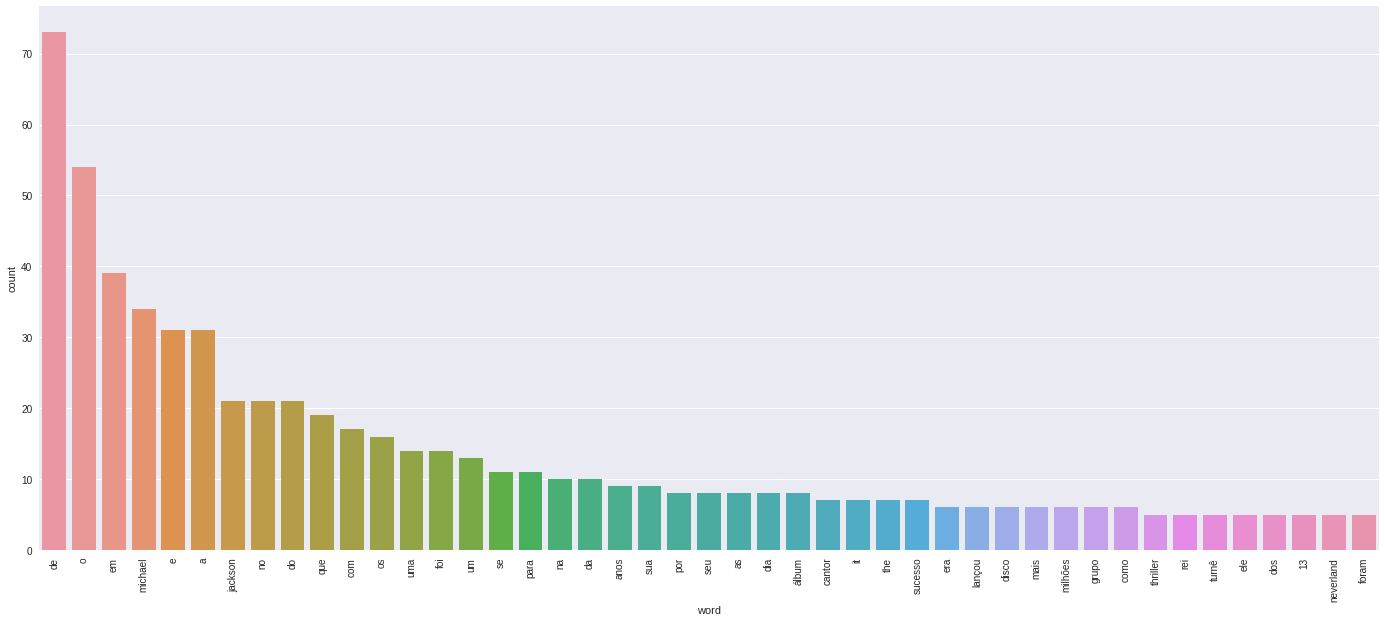

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.DataFrame(dict.items(),  columns=['word', 'count']).sort_values('count',ascending=False)
df = df[df['count'] > 4] # somente termos com mais de 4 ocorrências
# df = df.iloc[ np.int(len(df)/2) - 10 : np.int(len(df)/2) + 10 ] # para livros ou textos com muitos termos limita a um número mínimo de termos

plt.figure(figsize=(24,10))
mpl.style.use(['seaborn'])
sns.barplot(x=df.word,y=df['count'])
plt.xticks(rotation=90) 

plt.show()